# Logistic Regression

1)  We consider a binary classification problem and implement logistic regression using ```sklearn```.

2) We consider the same binary classification problem as above and we code logistic regression model from scratch as a single neuron with batch gradient descent. 

3) We consider a multiclass classfication problem with logistic regression using ```sklearn```.

---

## 1) Binary logistic regression using sklearn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [2]:
np.e

2.718281828459045

In [3]:
def sigmoid(z):
    return (1/(1+np.e**(-z)))

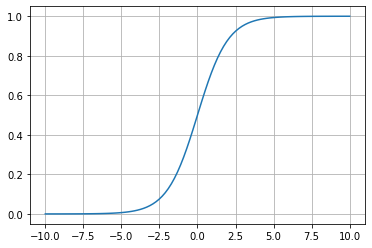

In [4]:
z = np.linspace(-10, 10, 100)

plt.plot(z, sigmoid(z))
plt.grid();

In [6]:
df = pd.read_csv('insurancedata.csv')
df.head()

,age,insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [7]:
df.shape

(27, 2)

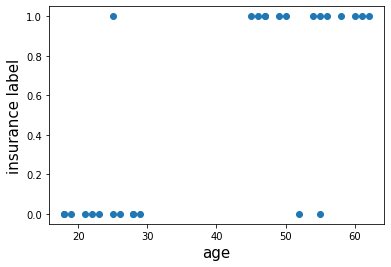

In [8]:
plt.scatter(df.age, df.insurance)
plt.xlabel('age', fontsize=15)
plt.ylabel('insurance label', fontsize=15);

In [9]:
X = df[['age']]
y = df['insurance']

log_reg = LogisticRegression()

log_reg.fit(X, y)

LogisticRegression()

In [10]:
log_reg.predict_proba([[65], [21]])

C:\Users\Student\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.02781947, 0.97218053],
       [0.92860822, 0.07139178]])

In [11]:
import warnings
warnings.filterwarnings("ignore")

In [17]:
log_reg.predict([[65],[21]])

array([1, 0], dtype=int64)

In [18]:
b = log_reg.intercept_
b

array([-5.48608377])

In [22]:
w = log_reg.coef_
w

array([[0.13907522]])

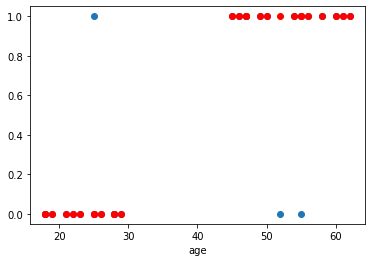

In [23]:
plt.scatter(X, y)

y_pred = log_reg.predict(X)

plt.scatter(X, y_pred, color = "red")

plt.xlabel('age');

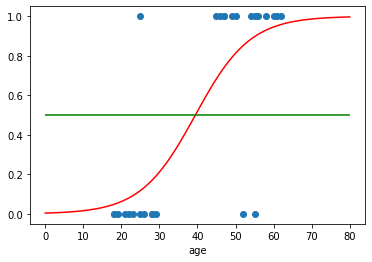

In [29]:
plt.scatter(X, y)

x_value = np.linspace(0, 80, 100)

def p(x, b, w):
    return 1/(1+ np.e**(-(w*x+b)))

plt.plot(x_value, p(x_value, b, w[0]), color="red")

plt.xlabel("age")

plt.hlines(xmin=0, xmax=80, y=0.5, color='green');

---

**Question:** What is the threshold age for making predictions?

---

In [30]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_pred)

array([[11,  2],
       [ 1, 13]], dtype=int64)

In [31]:
(11+13)/(11+13+2+1)

0.8888888888888888

In [32]:
log_reg.score(X, y)

0.8888888888888888

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.87      0.93      0.90        14

    accuracy                           0.89        27
   macro avg       0.89      0.89      0.89        27
weighted avg       0.89      0.89      0.89        27



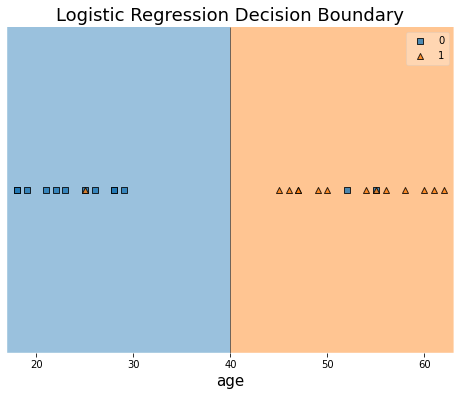

In [34]:
plt.figure(figsize = (8, 6))
plot_decision_regions(X.to_numpy(), y.to_numpy(), clf = log_reg)
plt.title("Logistic Regression Decision Boundary", fontsize = 18)
plt.xlabel("age", fontsize = 15);

---

## 2) Binary logistic regression from scratch

---

Consider dataset $D = \{ (x^{(1)}, y^{(1)}), \ldots, (x^{(n)}, y^{(n)})\}$ where $x^{(i)} \in \mathbb R$ and $y^{(i)} \in 
\{0,1\}$.

Linear logistic regression model is given by $h(x) = \sigma(wx + b)$, where 
$$
    \sigma(z) = \frac{1}{1+e^{-z}}
$$
is the sigmoid function.

We want to find parameters $w$ and $b$ that minimize the binary cross entropy loss: 

$$
L(w, b; D) = - \frac{1}{n}\sum_{i=1}^n  \left( y^{(i)} \log \hat y^{(i)} + (1-y^{(i)}) \log (1-\hat y^{(i)})\right)
$$

Since $L(w, b; D)$ is a differentiable function of both $w$ and $b$, and it is also convex, we can try to solve this minimization problem by applying the gradient descent algorithm:

$$
w_{new} = w - \alpha \frac{\partial L}{\partial w}(w, b; D)
$$

$$
b_{new} = b - \alpha \frac{\partial L}{\partial b}(w, b; D)
$$

where $\alpha$ is a learning rate hyperparameter and the derivaties are given by 

$$
\frac{\partial L}{\partial w}(w, b; D) = \frac{1}{n}\sum_{i=1}^{n}\Big(\hat{y}^{(i)} - y^{(i)}\Big)x^{(i)}
$$

$$
\frac{\partial L}{\partial b}(w, b; D) = \frac{1}{n}\sum_{i=1}^{n}\Big(\hat{y}^{(i)} - y^{(i)}\Big)
$$

---

In [35]:
class MyLogReg(object):
    """
    A class used to represent a single artificial neuron modeling logistic regression. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.
    
    loss_function : function
        The loss/cost function used to measure model performance.

    w : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the fit method is called.

    errors : list
        A list containing the binary cross entropy error computed after each epoch 
        of batch gradient descent.

    Methods
    -------
    fit(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the batch gradient descent algorithm 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of a feature vector X and associated label y. 

    predict(self, X)
        Uses the weights and bias, the feature vector X, and the 
        activation_function to make a y_hat prediction on each data instance. 
    """
    
    def __init__(self, activation_function, loss_function):
        self.activation_function = activation_function
        self.loss_function = loss_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
   
        self.w = np.random.rand(1 + X.shape[1])
        self.errors = []
        n = X.shape[0]

        for _ in range(epochs):
            errors = 0
            sum_1 = 0
            sum_2 = 0
            for xi, target in zip(X, y):    
                sum_1 += (self.predict(xi) - target)*xi
                sum_2 += (self.predict(xi) - target)
                errors +=self.loss_function(self.predict(xi), target)
            self.w[:-1] -= alpha*sum_1/n
            self.w[-1] -= alpha*sum_2/n
            self.errors.append(errors/n)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w[:-1]) + self.w[-1]
        return self.activation_function(preactivation)


    def plot_loss_function(self):
        fig, axs = plt.subplots(figsize = (8, 6))
        axs.plot(range(1, len(self.errors) + 1), 
                self.errors)
        axs.set_xlabel("Epochs", fontsize = 15)
        axs.set_ylabel("Binary cross entropy loss", fontsize = 15)
        axs.set_title("Loss Calculated During Training", fontsize = 18)
        plt.show()

    def plot_decision_boundary(self, X, y):
        plt.figure(figsize = (8, 6))
        plot_decision_regions(X, y, clf = self)
        plt.title("Logistic Regression Decision Boundary", fontsize = 18)
        plt.xlabel("age", fontsize = 15)
        plt.show()

In [36]:
def binary_cross_entropy_loss(y_hat, y):
    return -(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))

In [37]:
X = df[['age']].to_numpy()
X

array([[22],
       [25],
       [47],
       [52],
       [46],
       [56],
       [55],
       [60],
       [62],
       [61],
       [18],
       [28],
       [28],
       [29],
       [49],
       [55],
       [25],
       [58],
       [19],
       [18],
       [21],
       [26],
       [47],
       [45],
       [50],
       [54],
       [23]], dtype=int64)

In [38]:
y = df['insurance'].to_numpy()
y

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0], dtype=int64)

In [39]:
model = MyLogReg(sigmoid, binary_cross_entropy_loss)

model.train(X, y, alpha = 0.005, epochs = 3500)

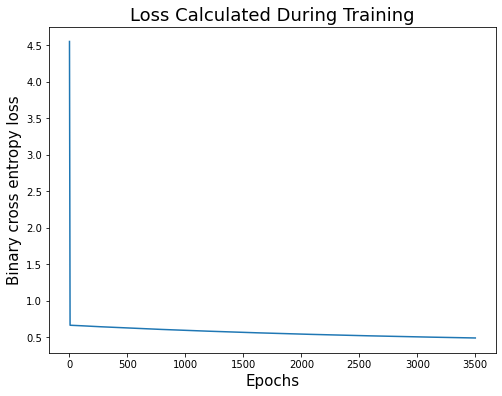

In [40]:
model.plot_loss_function();

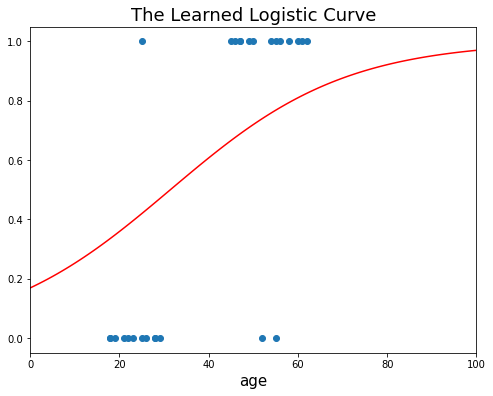

In [41]:
plt.figure(figsize = (8, 6))
plt.xlim((0, 100))

plt.scatter(df.age, df.insurance)

domain = np.linspace(0, 100, 100)
plt.plot(domain, model.predict(domain.reshape(-1, 1)), color="red")
plt.xlabel("age", fontsize = 15)
plt.title("The Learned Logistic Curve", fontsize = 18)
plt.show()

In [63]:
model.predict([[65]])

array([0.83452117])

In [64]:
print(np.rint(model.predict(X)) == y)

# round the predicted probability to the nearest interger to see what the predicted label is

[ True  True  True False  True  True False  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True]


In [65]:
predicted_labels = (np.rint(model.predict(X)) == y).astype(int)
print(f"Accuracy = {sum(predicted_labels)/ len(y)}")

Accuracy = 0.8888888888888888


In [66]:
predicted_labels

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

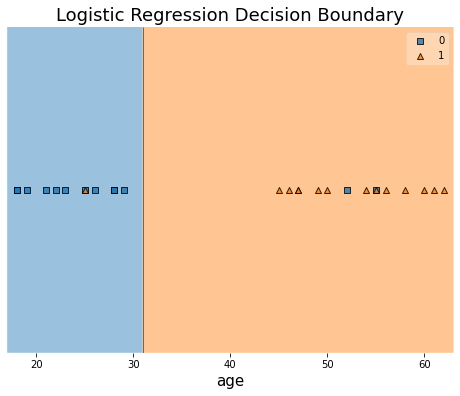

In [67]:
model.plot_decision_boundary(X, y)
plt.show()